Here, we build a periodic space-filling curve in order to transform 2D data to 1D signal. A space-filling curve is a line that completely fills up the unit square. It is a way of mapping the multi-dimensional space into the one-dimensional space. The Sierpiński curve is useful in several practical applications because it is more symmetrical than other commonly studied Hibert, Moore, and Peano space-filling curves. Sierpiński curves of orders 1 and 2 are shown in figure below. We see that the curve does not cover four center pixels if we overlay the first order Sierpiński curve over the red channel 4x4 matrix.


Sierpiński curves of orders 1 (orange) and 2 (black) |  3 Colour channel matrices of the input image of size 4x4x3
:-------------------------:|:-------------------------:
<img src="images/sierpinski-curve-original.png" style="width:300px;height:300px"/>  |  <img src="images/rgb_matrices.png" style="width:400px;height:300px"/>

We modified Sierpinski curve so that it passes through every pixel of the image. The curve is constructed as a sequence of short lines. Here is the direction order to build first order curve: (1,0), (0,-1), (1,1), (1,0), (0,-1), (-1,0), (1,-1), (0,-1). This curve now can read each pixel of the square matrix.

<img src="images/readwithcurve.png" style="width:500px;height:400px;">
For example, we read the red matrix of the 4x4x3 image in the following order: 35, 19, 22, 25, 6, 53, 16, 10, 3, 1, 7, 8, 0, 4, 3, 13.
The following code in Python 3 shows how to build the modified Nth order Sierpinski curve.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# N is the order of the curve
def modified_sierpinski_curve(N, plot_curve = True):
    #initialize arrays
    dx = np.zeros(2**(2*N), dtype=int)
    dy = np.zeros(2**(2*N), dtype=int)
    x = np.zeros(2**(2*N), dtype=int)
    y = np.zeros(2**(2*N), dtype=int)
    
    # directions of curve 
    dx[0:8] = [1, 0, 1, 1, 0, -1, 1, 0] 
    dy[0:8] = [0, -1, 1, 0, -1, 0, -1, -1]
    
    #building fractal curve
    for n in range(2,N):
        dx[2**(2*n-1):2**(2*n)] = -dy[0:2**(2*n-1)]
        dy[2**(2*n-1):2**(2*n)] = dx[0:2**(2*n-1)]
        dx[2**(2*n-1)] = 1
        dy[2**(2*n-1)] = 1
        dx[2**(2*n):2**(2*n+1)] = dy[0:2**(2*n)]
        dy[2**(2*n):2**(2*n+1)] = -dx[0:2**(2*n)]
    

    dx[2**(2*N-1):2**(2*N)] = -dx[0:2**(2*N-1)]
    dy[2**(2*N-1):2**(2*N)] = -dy[0:2**(2*N-1)]

    for i in range(2**(2*N)-1):
        x[i+1] = x[i] + dx[i]
        y[i+1] = y[i] + dy[i]
    
    if plot_curve:
        plt.plot(x,y)
        plt.show()
        
    return x, y

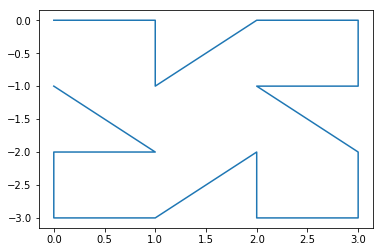

In [8]:
# 2nd order curve
x,y = modified_sierpinski_curve(2)

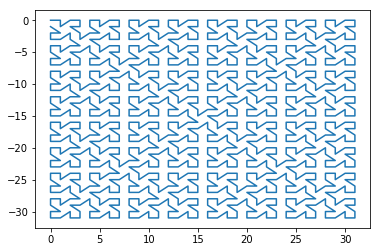

In [12]:
# 5th order curve
x,y = modified_sierpinski_curve(5) 